<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220805_%EC%9D%B4%ED%83%88%EA%B3%A0%EA%B0%9D_%EB%B0%A9%EC%A7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이탈고객 방지

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [3]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d barun2104/telecom-churn

  0% 0.00/45.5k [00:00<?, ?B/s]
100% 45.5k/45.5k [00:00<00:00, 33.7MB/s]


In [4]:
!unzip '*.zip' -d/content

Archive:  telecom-churn.zip
  inflating: /content/telecom_churn.csv  


In [6]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/telecom_churn.csv')
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [10]:
df.describe() # 스케일 차이가 크니 정규화 필요

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [11]:
df.isnull().sum() # 결측치 0

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [14]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [15]:
df['Churn'] = df['Churn'].map({0:'No', 1:'Yes'})

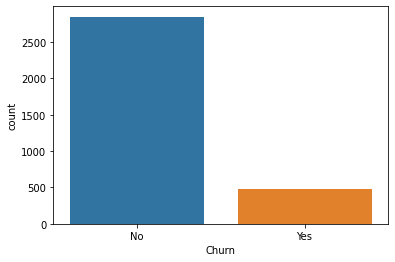

In [16]:
sns.countplot(x='Churn', data=df) # No 데이터가 훨씬 많음 <- 오버샘플링 필요

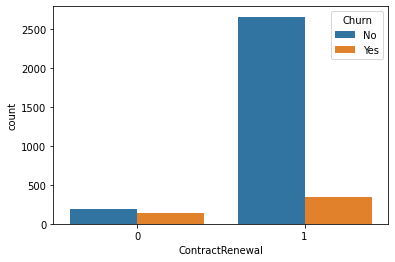

In [18]:
sns.countplot(x='ContractRenewal', data=df,  # 최근 기준이 언제? 기존고객의 이탈비율이 높다고 볼 수 있다.
              hue='Churn')

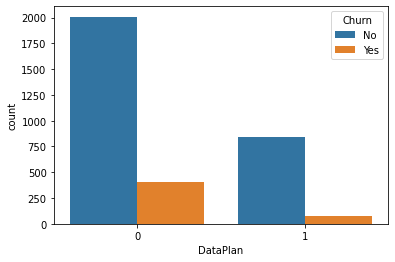

In [19]:
sns.countplot(x='DataPlan', data=df, # 데이터 플랜이 있을수록 이탈률이 낮음 
              hue='Churn')

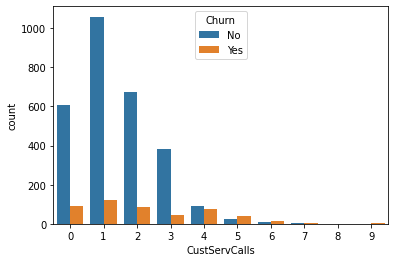

In [20]:
sns.countplot(x='CustServCalls', data=df, # 고객서비스 이용횟수가 많을수록 이탈률이 증가한다.
              hue='Churn')

#### 수치형 데이터 그래프

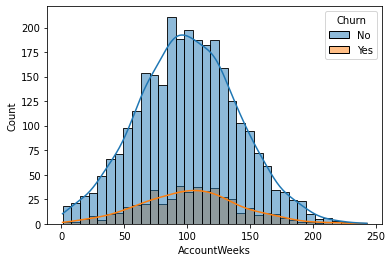

In [21]:
sns.histplot(x='AccountWeeks', data=df, # 정규분포와 유사하며 큰 특징 없음
             hue='Churn', kde='True')

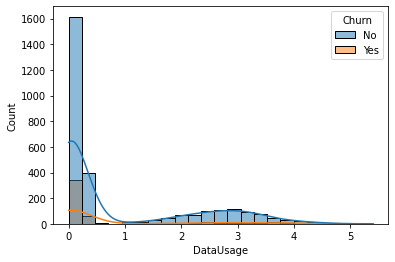

In [22]:
sns.histplot(x='DataUsage', data=df,  # 상대적으로 데이터 이용량이 적은층이 이탈률이 높다고 보여짐
             hue='Churn', kde='True')

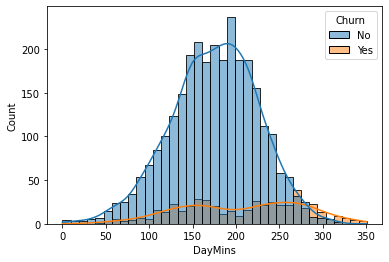

In [23]:
sns.histplot(x='DayMins', data=df, # 상위구간 고객들이 이탈률이 높은 경향
             hue='Churn', kde='True')

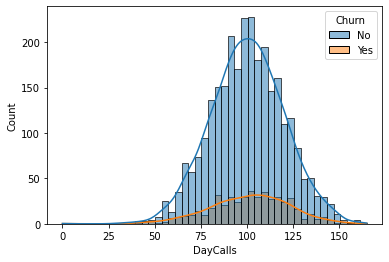

In [24]:
sns.histplot(x='DayCalls', data=df, 
             hue='Churn', kde='True')

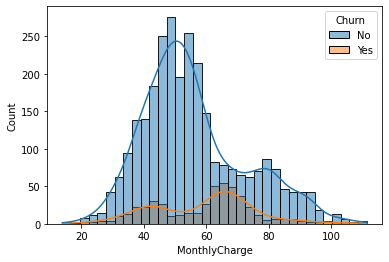

In [26]:
sns.histplot(x='MonthlyCharge', data=df, # 62~75 구간 사이의 고객들이 이탈률이 매우 높게 나타남.
             hue='Churn', kde='True')

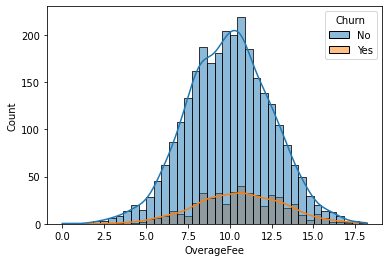

In [27]:
sns.histplot(x='OverageFee', data=df, 
             hue='Churn', kde='True')

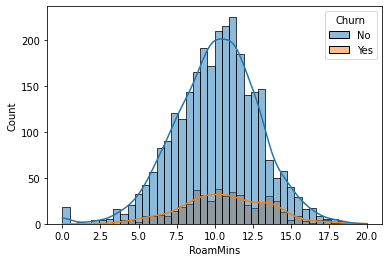

In [25]:
sns.histplot(x='RoamMins', data=df, 
             hue='Churn', kde='True')

데이터 사용량이 적은데 이용시간 많은 고객이 이탈률 제일 높음
-> 고객센터의 이용횟수가 많은 고객이 이탈률 높음,

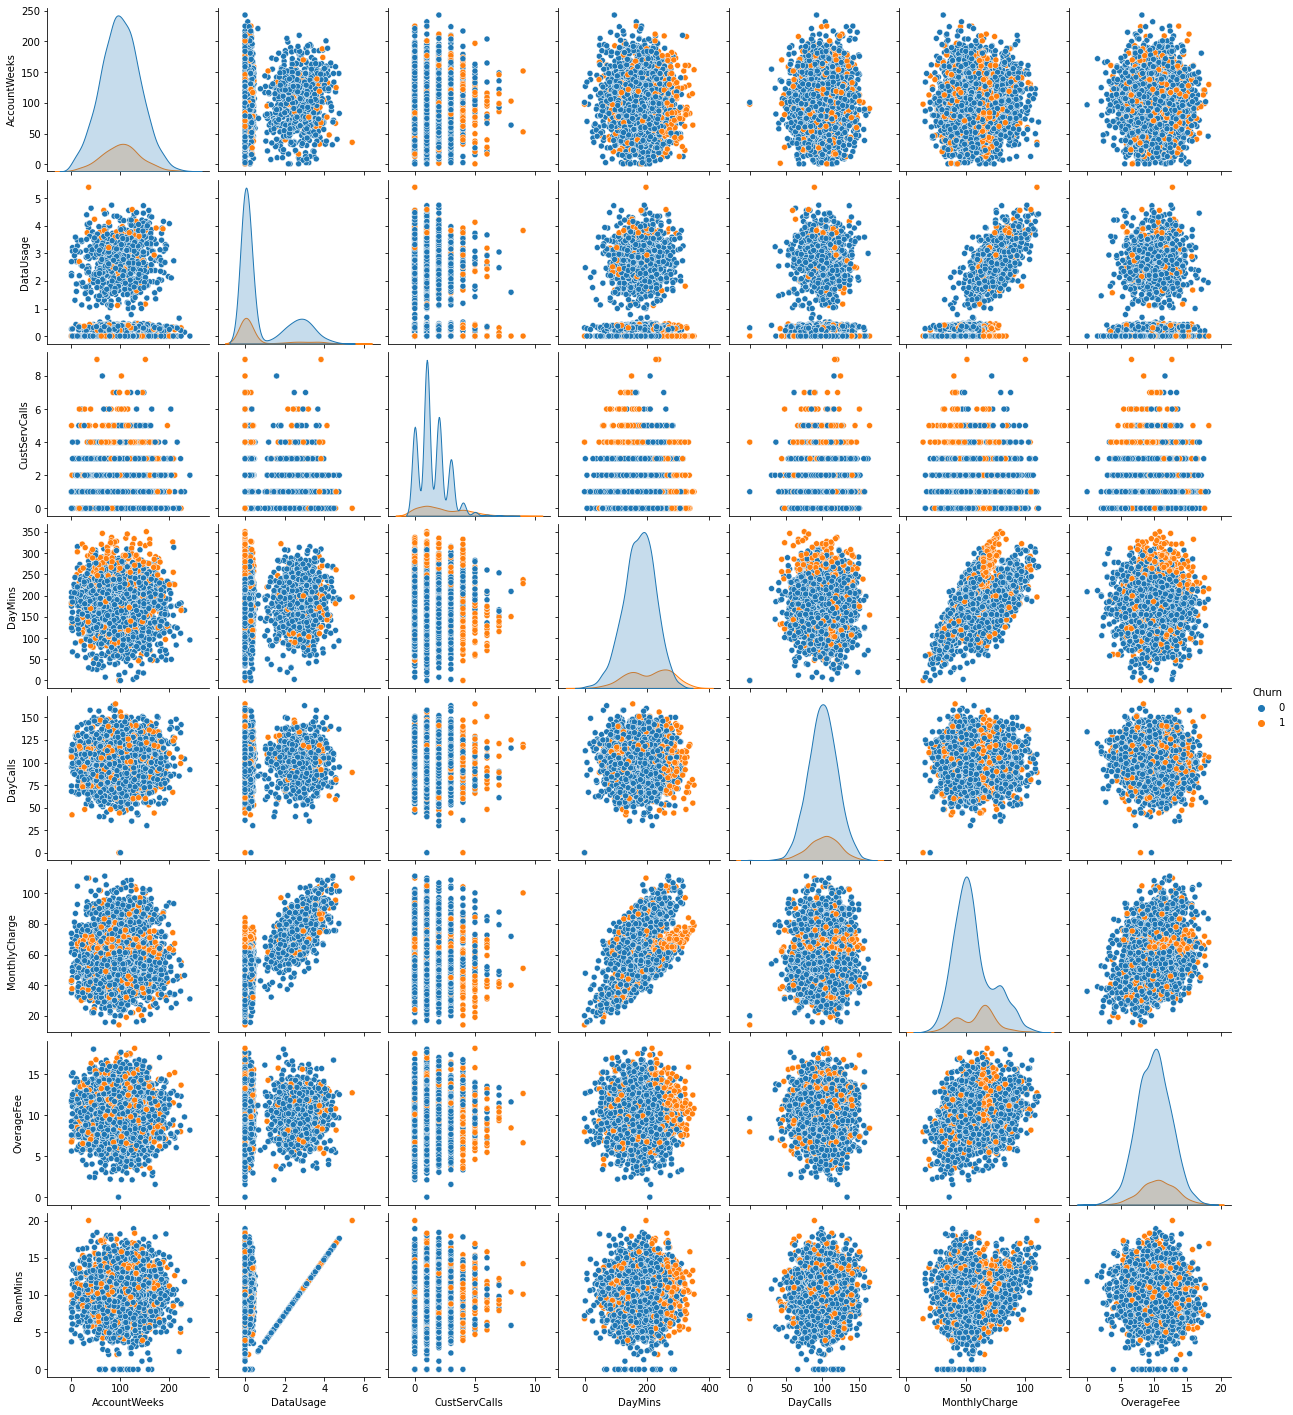

In [40]:
sns.pairplot(df, x_vars =['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls',
                          'MonthlyCharge','OverageFee'],
             y_vars =['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls',
                          'MonthlyCharge','OverageFee','RoamMins'], hue='Churn')

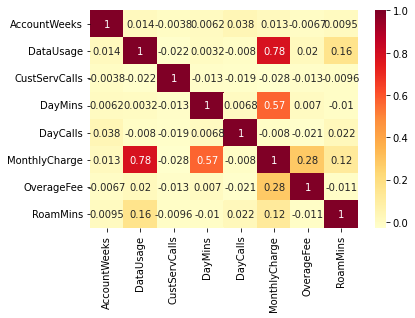

In [41]:
sns.heatmap(df[['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls',
                          'MonthlyCharge','OverageFee','RoamMins']].corr(), 
            annot=True, cmap='YlOrRd')
# 데이터 사용량, 주간 사용량과 월별 가격은 높은 상관관계를 띈다.

#### 전처리

In [32]:
dict(No = 0, Yes = 1)

{'No': 0, 'Yes': 1}

In [33]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### get_dummies()를 이용하여 범주형 데이터 전처리하기
'Securities Account', 'CD Account', 'Online', 'CreditCard'는 이진 분류기 때문에 원 핫 인코딩을 하지 않아도 된다.


In [34]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [38]:
X_cat = df['CustServCalls']
X_cat = pd.get_dummies(X_cat,prefix='CustServCalls')
X_cat.head()

,CustServCalls_0,CustServCalls_1,CustServCalls_2,CustServCalls_3,CustServCalls_4,CustServCalls_5,CustServCalls_6,CustServCalls_7,CustServCalls_8,CustServCalls_9
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


### StandardScaler를 이용해 수치형 데이터 표준화하기

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = df[['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge','OverageFee','RoamMins']]
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.676489,1.480204,1.566767,0.476643,1.990727,-0.071584,-0.085008
1,0.149065,2.266072,-0.333738,1.124503,1.564510,-0.107082,1.240482
2,0.902529,-0.641642,1.168304,0.675985,-0.262133,-1.574346,0.703121
3,-0.428590,-0.641642,2.196596,-1.466936,0.042307,-2.741846,-1.303026
4,-0.654629,-0.641642,-0.240090,0.626149,-0.931902,-1.037927,-0.049184


### 학습데이터와 테스트데이터 분리하기


In [42]:
X_scaled.columns

Index(['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge',
       'OverageFee', 'RoamMins'],
      dtype='object')

In [44]:
X_cat.columns

Index(['CustServCalls_0', 'CustServCalls_1', 'CustServCalls_2',
       'CustServCalls_3', 'CustServCalls_4', 'CustServCalls_5',
       'CustServCalls_6', 'CustServCalls_7', 'CustServCalls_8',
       'CustServCalls_9'],
      dtype='object')

In [112]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
cat_lst = ['ContractRenewal', 'DataPlan']
X = pd.concat([X_scaled, X_cat, df[cat_lst]], axis=1)
y = df['Churn']

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   float64
 1   DataUsage        3333 non-null   float64
 2   DayMins          3333 non-null   float64
 3   DayCalls         3333 non-null   float64
 4   MonthlyCharge    3333 non-null   float64
 5   OverageFee       3333 non-null   float64
 6   RoamMins         3333 non-null   float64
 7   CustServCalls_0  3333 non-null   uint8  
 8   CustServCalls_1  3333 non-null   uint8  
 9   CustServCalls_2  3333 non-null   uint8  
 10  CustServCalls_3  3333 non-null   uint8  
 11  CustServCalls_4  3333 non-null   uint8  
 12  CustServCalls_5  3333 non-null   uint8  
 13  CustServCalls_6  3333 non-null   uint8  
 14  CustServCalls_7  3333 non-null   uint8  
 15  CustServCalls_8  3333 non-null   uint8  
 16  CustServCalls_9  3333 non-null   uint8  
 17  ContractRenewa

In [48]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
print(X_train.shape)
print(X_test.shape)

(2333, 19)
(1000, 19)


#### 오버 샘플링

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2333, 19) (2333,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (3990, 19) (3990,)
SMOTE 적용 후 레이블 값 분포: 
 0    1995
1    1995
Name: Churn, dtype: int64


#### 머신러닝 모델링

In [60]:
# 평가함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현률 : {2:.4f},\
  F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

In [61]:
# 인자로 사이킷런의 Estimator 객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
# ML알고리즘 객체 전달 후 학습/예측/평가 함수
def get_model_train_eval(model, ftr_train=None, ftr_test=None,
                         tgt_train=None, tgt_test=None):
  start_time = time.time()
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test, pred)
  print('수행시간 : {0:.1f}초 '.format(time.time() - start_time))

#### 로지스틱 회귀

In [62]:
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=900)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[824  31]
 [122  23]]
정확도 : 0.8470, 정밀도 : 0.4259, 재현률 : 0.1586,  F1 : 0.2312
수행시간 : 0.1초 


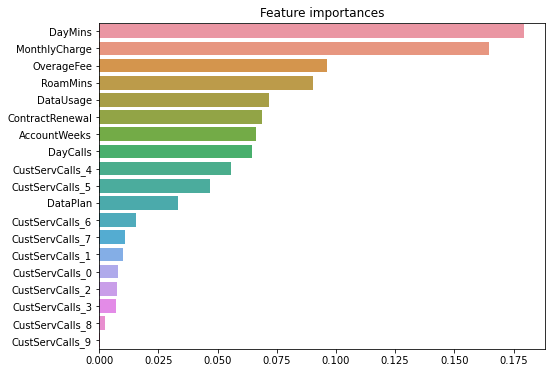

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = Ir_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### Dicision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[781  74]
 [ 53  92]]
정확도 : 0.8730, 정밀도 : 0.5542, 재현률 : 0.6345,  F1 : 0.5916
수행시간 : 0.1초 


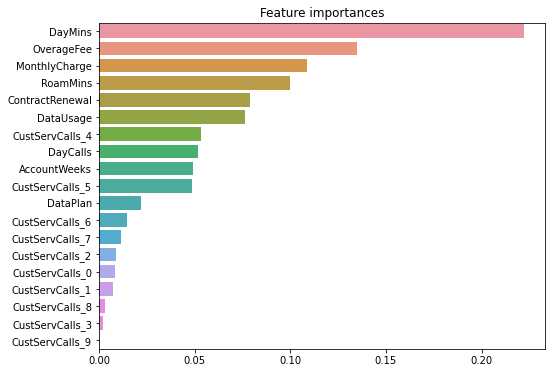

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
dtree = DecisionTreeClassifier()
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4,5,6,7,8], 'min_samples_split':[2,3,4,5,6,7,8]}
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 
           'rank_test_score','split0_test_score', 
           'split1_test_score', 'split2_test_score']]

In [96]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
estimator_matrix = metrics.confusion_matrix(y_test, pred)  
print(estimator_matrix)
print(classification_report(y_test, pred))

[[812  43]
 [ 56  89]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       855
           1       0.67      0.61      0.64       145

    accuracy                           0.90      1000
   macro avg       0.80      0.78      0.79      1000
weighted avg       0.90      0.90      0.90      1000



#### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[838  17]
 [ 55  90]]
정확도 : 0.9280, 정밀도 : 0.8411, 재현률 : 0.6207,  F1 : 0.7143
수행시간 : 4.2초 


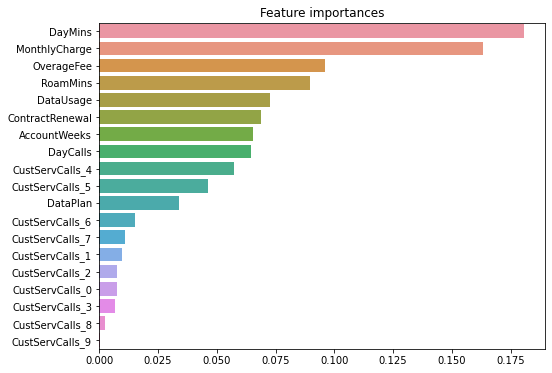

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### Support Vector Machines Classifier


In [90]:
from sklearn import svm
# 모형 객체 생성 (기본값 kernel='rbf' 적용)
svm = svm.SVC()
svm.fit(X_train, y_train) 
get_model_train_eval(svm, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[845  10]
 [ 86  59]]
정확도 : 0.9040, 정밀도 : 0.8551, 재현률 : 0.4069,  F1 : 0.5514
수행시간 : 0.2초 


#### KNN

In [68]:
k_lst = list(range(1,12,2))
# 모델 생성/학습
for k in k_lst:
  print('****************************K={}****************************'.format(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  knn_matrix = metrics.confusion_matrix(y_test, pred)  
  print(knn_matrix)
  print(classification_report(y_test, pred))

****************************K=1****************************
[[800  55]
 [ 90  55]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       855
           1       0.50      0.38      0.43       145

    accuracy                           0.85      1000
   macro avg       0.70      0.66      0.67      1000
weighted avg       0.84      0.85      0.85      1000

****************************K=3****************************
[[831  24]
 [ 98  47]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       855
           1       0.66      0.32      0.44       145

    accuracy                           0.88      1000
   macro avg       0.78      0.65      0.68      1000
weighted avg       0.86      0.88      0.86      1000

****************************K=5****************************
[[843  12]
 [106  39]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.9